<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


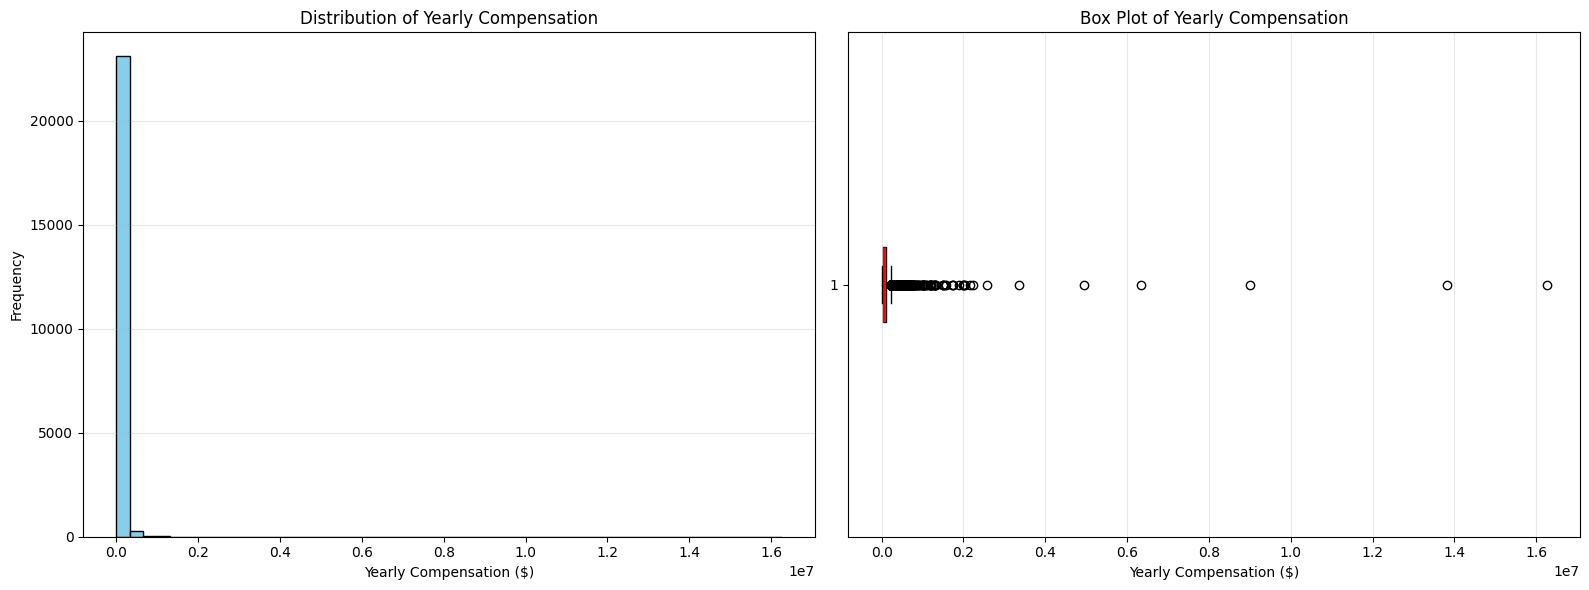


Compensation Statistics:
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


In [3]:
# Plot the distribution and histogram for ConvertedCompYearly
if 'ConvertedCompYearly' in df.columns:
    # Ensure the column is numeric
    df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
    
    # Remove NaN values
    comp_data = df['ConvertedCompYearly'].dropna()
    
    # Create figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Histogram
    axes[0].hist(comp_data, bins=50, color='skyblue', edgecolor='black')
    axes[0].set_title('Distribution of Yearly Compensation')
    axes[0].set_xlabel('Yearly Compensation ($)')
    axes[0].set_ylabel('Frequency')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Box plot
    axes[1].boxplot(comp_data, vert=False, patch_artist=True,
                    boxprops=dict(facecolor='lightgreen', color='black'),
                    whiskerprops=dict(color='black'),
                    capprops=dict(color='black'),
                    medianprops=dict(color='red', linewidth=2))
    axes[1].set_title('Box Plot of Yearly Compensation')
    axes[1].set_xlabel('Yearly Compensation ($)')
    axes[1].grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\nCompensation Statistics:")
    print("="*60)
    print(comp_data.describe())

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [4]:
# Filter the data to calculate median compensation for full-time employees
if 'Employment' in df.columns and 'ConvertedCompYearly' in df.columns:
    # Filter for full-time employees
    full_time_employees = df[df['Employment'] == 'Employed, full-time']
    
    # Calculate median compensation
    median_full_time_comp = full_time_employees['ConvertedCompYearly'].median()
    
    print("Full-Time Employee Compensation Analysis:")
    print("="*60)
    print(f"Number of full-time employees: {len(full_time_employees)}")
    print(f"Median compensation: ${median_full_time_comp:,.2f}")
    
    print("\n" + "="*60 + "\n")
    
    # Additional statistics
    print("Full-Time Employee Compensation Statistics:")
    print(full_time_employees['ConvertedCompYearly'].describe())

Full-Time Employee Compensation Analysis:
Number of full-time employees: 39041
Median compensation: $69,814.00


Full-Time Employee Compensation Statistics:
count    1.758600e+04
mean     8.892111e+04
std      1.311224e+05
min      1.000000e+00
25%      3.866600e+04
50%      6.981400e+04
75%      1.116902e+05
max      9.000000e+06
Name: ConvertedCompYearly, dtype: float64


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



<Figure size 1600x800 with 0 Axes>

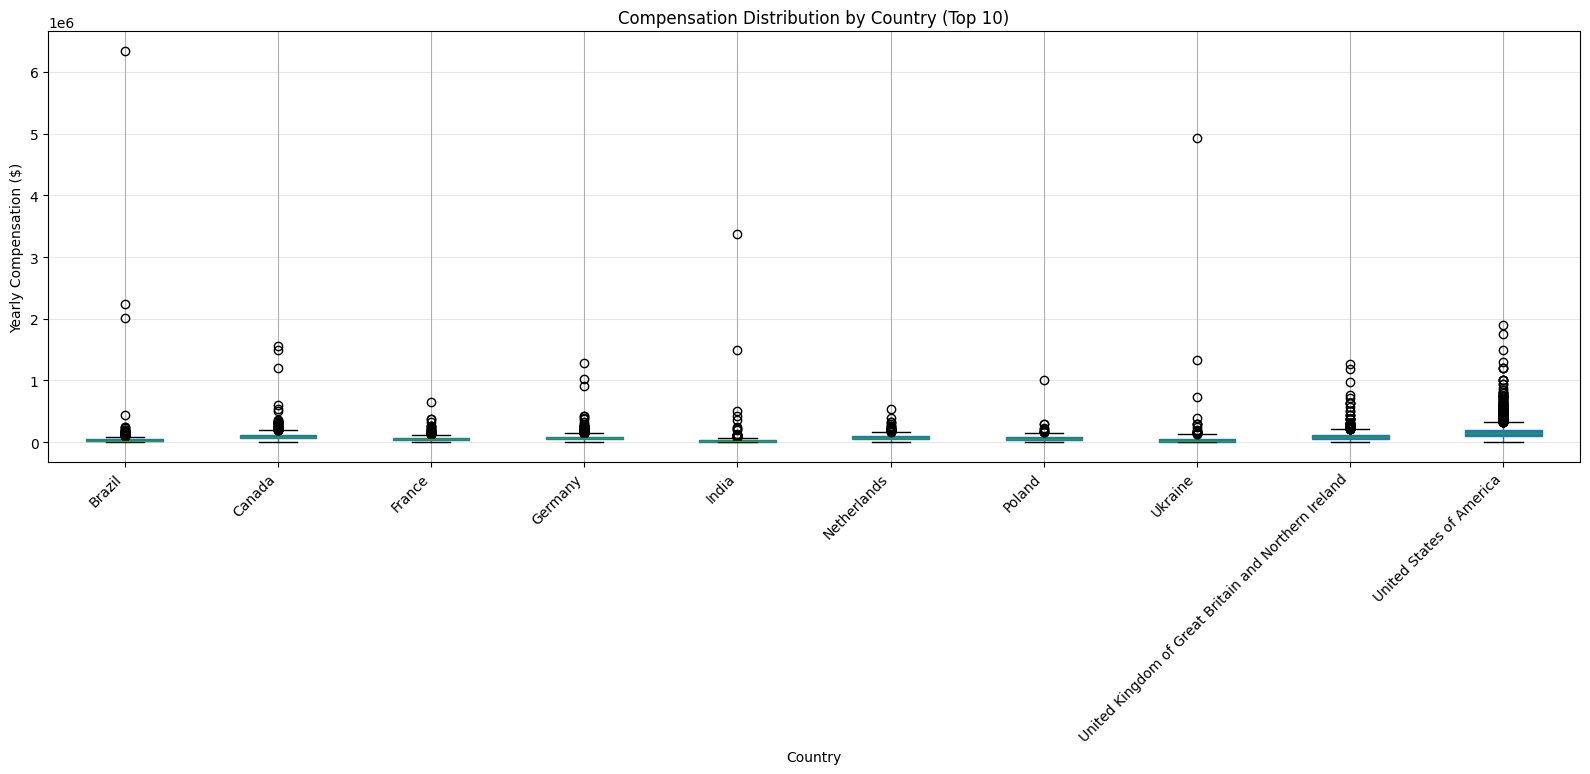



Median Compensation by Country:
                                                      median           mean  \
Country                                                                       
United States of America                            143000.0  161072.335685   
Canada                                               87231.0  102348.691160   
United Kingdom of Great Britain and Northern Ir...   84076.0  102603.315600   
Germany                                              73036.0   77054.550831   
Netherlands                                          69814.0   82317.967914   
Poland                                               55535.5   61901.534130   
France                                               53703.0   62761.198257   
Ukraine                                              26903.5   39455.767300   
Brazil                                               23945.0   51216.227737   
India                                                16749.0   30513.611379   

                 

In [5]:
# Explore the range of compensation by country
if 'Country' in df.columns and 'ConvertedCompYearly' in df.columns:
    # Get top 10 countries by number of respondents
    top_countries = df['Country'].value_counts().head(10).index
    df_top_countries = df[df['Country'].isin(top_countries)].copy()
    
    # Remove NaN values in compensation
    df_top_countries = df_top_countries.dropna(subset=['ConvertedCompYearly'])
    
    # Create box plots to compare compensation distributions
    plt.figure(figsize=(16, 8))
    df_top_countries.boxplot(column='ConvertedCompYearly', by='Country', 
                             figsize=(16, 8), patch_artist=True)
    plt.title('Compensation Distribution by Country (Top 10)')
    plt.suptitle('')  # Remove default title
    plt.xlabel('Country')
    plt.ylabel('Yearly Compensation ($)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\n" + "="*60 + "\n")
    
    # Calculate statistics by country
    print("Median Compensation by Country:")
    country_stats = df_top_countries.groupby('Country')['ConvertedCompYearly'].agg(['median', 'mean', 'count']).sort_values('median', ascending=False)
    print(country_stats)

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [6]:
# Create a new DataFrame by removing outliers from ConvertedCompYearly
if 'ConvertedCompYearly' in df.columns:
    # Calculate IQR
    comp_data = df['ConvertedCompYearly'].dropna()
    Q1 = comp_data.quantile(0.25)
    Q3 = comp_data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    print("Outlier Detection Using IQR Method:")
    print("="*60)
    print(f"Q1: ${Q1:,.2f}")
    print(f"Q3: ${Q3:,.2f}")
    print(f"IQR: ${IQR:,.2f}")
    print(f"Lower Bound: ${lower_bound:,.2f}")
    print(f"Upper Bound: ${upper_bound:,.2f}")
    
    # Create new DataFrame without outliers
    df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & 
                        (df['ConvertedCompYearly'] <= upper_bound)].copy()
    
    print("\n" + "="*60 + "\n")
    print("Dataset Comparison:")
    print(f"Original dataset: {len(df)} rows")
    print(f"Dataset without outliers: {len(df_no_outliers)} rows")
    print(f"Rows removed: {len(df) - len(df_no_outliers)}")
    print(f"Percentage removed: {((len(df) - len(df_no_outliers)) / len(df) * 100):.2f}%")

Outlier Detection Using IQR Method:
Q1: $32,712.00
Q3: $107,971.50
IQR: $75,259.50
Lower Bound: $-80,177.25
Upper Bound: $220,860.75


Dataset Comparison:
Original dataset: 65437 rows
Dataset without outliers: 22457 rows
Rows removed: 42980
Percentage removed: 65.68%


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


Correlation Matrix:
                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.408438       -0.058170
WorkExp                         0.408438  1.000000       -0.032388
JobSatPoints_1                 -0.058170 -0.032388        1.000000




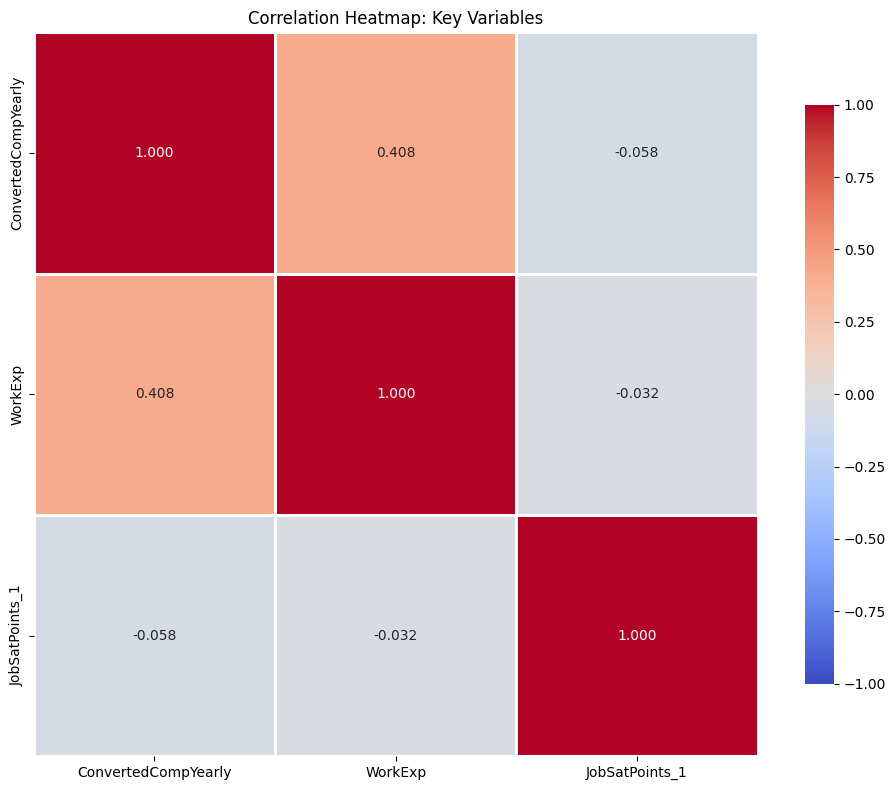

In [7]:
# Calculate correlations between ConvertedCompYearly, WorkExp, and JobSatPoints_1
if 'ConvertedCompYearly' in df_no_outliers.columns:
    # Select relevant columns for correlation
    # Note: Column names may vary - adjust as needed
    correlation_columns = ['ConvertedCompYearly']
    
    # Add WorkExp if it exists
    if 'WorkExp' in df_no_outliers.columns:
        correlation_columns.append('WorkExp')
        df_no_outliers['WorkExp'] = pd.to_numeric(df_no_outliers['WorkExp'], errors='coerce')
    
    # Add JobSatPoints_1 if it exists (or use JobSat)
    if 'JobSatPoints_1' in df_no_outliers.columns:
        correlation_columns.append('JobSatPoints_1')
        df_no_outliers['JobSatPoints_1'] = pd.to_numeric(df_no_outliers['JobSatPoints_1'], errors='coerce')
    elif 'JobSat' in df_no_outliers.columns:
        correlation_columns.append('JobSat')
        df_no_outliers['JobSat'] = pd.to_numeric(df_no_outliers['JobSat'], errors='coerce')
    
    # Calculate correlation matrix
    correlation_matrix = df_no_outliers[correlation_columns].corr()
    
    print("Correlation Matrix:")
    print("="*60)
    print(correlation_matrix)
    
    print("\n" + "="*60 + "\n")
    
    # Visualize with heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
                square=True, linewidths=1, cbar_kws={"shrink": 0.8},
                vmin=-1, vmax=1)
    plt.title('Correlation Heatmap: Key Variables')
    plt.tight_layout()
    plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


In [ ]:
# Create scatter plots to examine specific correlations
if 'ConvertedCompYearly' in df_no_outliers.columns:
    # Scatter plot 1: ConvertedCompYearly vs WorkExp
    if 'WorkExp' in df_no_outliers.columns:
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Plot 1: Compensation vs Work Experience
        scatter_data1 = df_no_outliers[['ConvertedCompYearly', 'WorkExp']].dropna()
        axes[0].scatter(scatter_data1['WorkExp'], scatter_data1['ConvertedCompYearly'], 
                       alpha=0.5, color='blue')
        axes[0].set_title('Compensation vs Work Experience')
        axes[0].set_xlabel('Work Experience (years)')
        axes[0].set_ylabel('Yearly Compensation ($)')
        axes[0].grid(True, alpha=0.3)
        
        # Calculate correlation
        corr1 = scatter_data1['ConvertedCompYearly'].corr(scatter_data1['WorkExp'])
        axes[0].text(0.05, 0.95, f'Correlation: {corr1:.3f}', 
                    transform=axes[0].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # Scatter plot 2: ConvertedCompYearly vs JobSatPoints_1
    if 'JobSatPoints_1' in df_no_outliers.columns:
        scatter_data2 = df_no_outliers[['ConvertedCompYearly', 'JobSatPoints_1']].dropna()
        axes[1].scatter(scatter_data2['JobSatPoints_1'], scatter_data2['ConvertedCompYearly'], 
                       alpha=0.5, color='green')
        axes[1].set_title('Compensation vs Job Satisfaction')
        axes[1].set_xlabel('Job Satisfaction Points')
        axes[1].set_ylabel('Yearly Compensation ($)')
        axes[1].grid(True, alpha=0.3)
        
        # Calculate correlation
        corr2 = scatter_data2['ConvertedCompYearly'].corr(scatter_data2['JobSatPoints_1'])
        axes[1].text(0.05, 0.95, f'Correlation: {corr2:.3f}', 
                    transform=axes[1].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    elif 'JobSat' in df_no_outliers.columns:
        scatter_data2 = df_no_outliers[['ConvertedCompYearly', 'JobSat']].dropna()
        axes[1].scatter(scatter_data2['JobSat'], scatter_data2['ConvertedCompYearly'], 
                       alpha=0.5, color='green')
        axes[1].set_title('Compensation vs Job Satisfaction')
        axes[1].set_xlabel('Job Satisfaction Score')
        axes[1].set_ylabel('Yearly Compensation ($)')
        axes[1].grid(True, alpha=0.3)
        
        corr2 = scatter_data2['ConvertedCompYearly'].corr(scatter_data2['JobSat'])
        axes[1].text(0.05, 0.95, f'Correlation: {corr2:.3f}', 
                    transform=axes[1].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
